In [1]:
import os
import sys
import pandas as pd
import statsmodels.api as sm

In [2]:
from statsmodels.iolib.summary2 import summary_col
import seaborn as sns # <- regression plot
import matplotlib.pyplot as plt

In [3]:
print('\nWorking directory:\nold path -> ', os.getcwd() )


Working directory:
old path ->  C:\Users\mixas\intro


In [12]:
d = {'x': (2, 2, 1, 4, 5),
     'y': [2, 2, 3, 4, 5]}

In [13]:
my_data = pd.DataFrame(data=d)

In [14]:
print('\n', my_data)


    x  y
0  2  2
1  2  2
2  1  3
3  4  4
4  5  5


In [15]:
o1 = sm.OLS.from_formula("y ~ x", data=my_data).fit()

In [16]:
print('\n',o1.summary())


                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     7.200
Date:                Wed, 05 Jun 2024   Prob (F-statistic):             0.0748
Time:                        15:21:12   Log-Likelihood:                -4.8040
No. Observations:                   5   AIC:                             13.61
Df Residuals:                       3   BIC:                             12.83
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3333      0.786      1.697      0

C:\Users\mixas\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [17]:
info={'Observations' : lambda x: f"{int(x.nobs):d}",
        'Adj. R-sq.' : lambda x: f"{x.rsquared_adj:.3f}",
        'F' : lambda x: f"{x.fvalue:.1f}",
        'F p-value' : lambda x: f"{x.f_pvalue:.3f}"}
results_table = summary_col(results=o1,
                            float_format='%0.3f',
                            stars = True,
                            info_dict=info)
results_table.add_title('OLS Regression')
print('\n',results_table)


     OLS Regression
                  y   
----------------------
Intercept      1.333  
               (0.786)
x              0.667* 
               (0.248)
R-squared      0.706  
R-squared Adj. 0.608  
Observations   5      
Adj. R-sq.     0.608  
F              7.2    
F p-value      0.075  
Standard errors in
parentheses.
* p<.1, ** p<.05,
***p<.01


Text(30.625000000000007, 0.5, 'y')

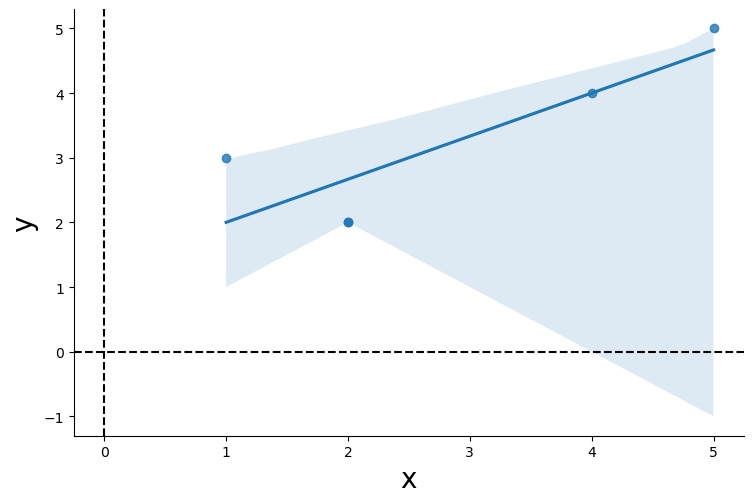

In [18]:
sns.lmplot(y="y", x="x", data=my_data, aspect=1.5)
plt.axvline(0, color="k", linestyle="--")
plt.axhline(0, color="k", linestyle="--")
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)

In [19]:
y=pd.read_csv("arctica.csv")

In [20]:
print('\n', y, '\n\n', y.shape[0] )


      year  month     value
0    1950      1 -0.060310
1    1950      2  0.626810
2    1950      3 -0.008127
3    1950      4  0.555100
4    1950      5  0.071577
..    ...    ...       ...
834  2019      7 -0.889690
835  2019      8 -0.721770
836  2019      9  0.306200
837  2019     10 -0.082195
838  2019     11 -1.193400

[839 rows x 3 columns] 

 839


In [21]:
# Создадим индекс временного ряда >>
y.index = pd.date_range(start='1/1/1950',
                          periods = y.shape[0],
                          freq = 'MS')
print('\n', y)

y.info()


             year  month     value
1950-01-01  1950      1 -0.060310
1950-02-01  1950      2  0.626810
1950-03-01  1950      3 -0.008127
1950-04-01  1950      4  0.555100
1950-05-01  1950      5  0.071577
...          ...    ...       ...
2019-07-01  2019      7 -0.889690
2019-08-01  2019      8 -0.721770
2019-09-01  2019      9  0.306200
2019-10-01  2019     10 -0.082195
2019-11-01  2019     11 -1.193400

[839 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 839 entries, 1950-01-01 to 2019-11-01
Freq: MS
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    839 non-null    int64  
 1   month   839 non-null    int64  
 2   value   839 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 26.2 KB


In [22]:
# count missing values >>
print('\n', y.isnull().sum() )


 year     0
month    0
value    0
dtype: int64


In [25]:
import numpy as np
# two-way tabulation >>
print('\n', pd.crosstab(y.year,y.month),
    '\n\n', pd.crosstab(y.year,y.month).sum() )


 month  1   2   3   4   5   6   7   8   9   10  11  12
year                                                 
1950    1   1   1   1   1   1   1   1   1   1   1   1
1951    1   1   1   1   1   1   1   1   1   1   1   1
1952    1   1   1   1   1   1   1   1   1   1   1   1
1953    1   1   1   1   1   1   1   1   1   1   1   1
1954    1   1   1   1   1   1   1   1   1   1   1   1
...    ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
2015    1   1   1   1   1   1   1   1   1   1   1   1
2016    1   1   1   1   1   1   1   1   1   1   1   1
2017    1   1   1   1   1   1   1   1   1   1   1   1
2018    1   1   1   1   1   1   1   1   1   1   1   1
2019    1   1   1   1   1   1   1   1   1   1   1   0

[70 rows x 12 columns] 

 month
1     70
2     70
3     70
4     70
5     70
6     70
7     70
8     70
9     70
10    70
11    70
12    69
dtype: int64


<Axes: >

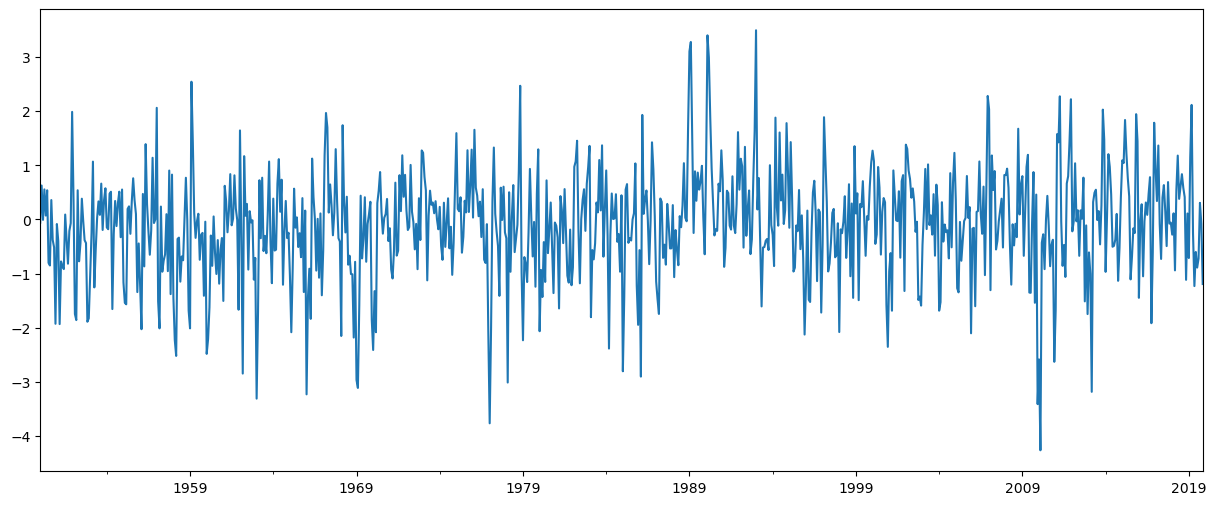

In [26]:
y.value.plot(figsize=(15, 6))

In [27]:
y2= pd.DataFrame()
y2
y2['value'] = y['value'].resample('Y').mean()
y2

,value
1950-12-31,-0.199501
1951-12-31,-0.364626
1952-12-31,-0.674990
1953-12-31,-0.016515
1954-12-31,-0.000770
...,...
2015-12-31,0.629559
2016-12-31,-0.114137
2017-12-31,0.256308
2018-12-31,0.202732


<Axes: >

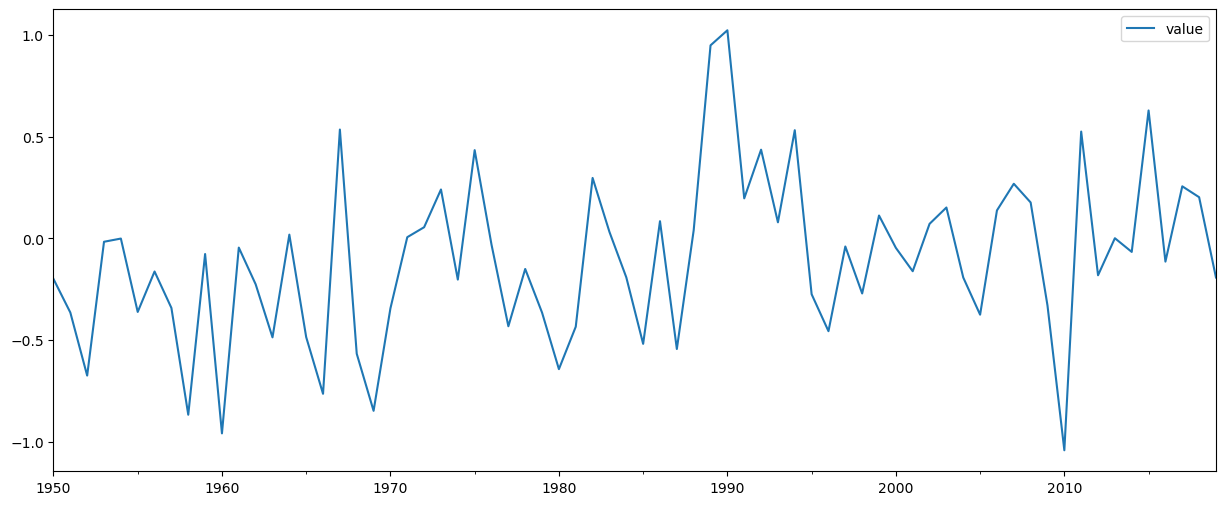

In [28]:
y2.plot(figsize=(15, 6))

In [29]:
y.index
y.index[0]
y.index.freq
new_index = pd.date_range(start=y.index[0],
                        periods = y.shape[0]+1,
                        freq = y.index.freq)
new_index
y = y.reindex(index=new_index)
y


,year,month,value
1950-01-01,1950.0,1.0,-0.060310
1950-02-01,1950.0,2.0,0.626810
1950-03-01,1950.0,3.0,-0.008127
1950-04-01,1950.0,4.0,0.555100
1950-05-01,1950.0,5.0,0.071577
...,...,...,...
2019-08-01,2019.0,8.0,-0.721770
2019-09-01,2019.0,9.0,0.306200
2019-10-01,2019.0,10.0,-0.082195
2019-11-01,2019.0,11.0,-1.193400


In [30]:
y = y.fillna(y.ffill())

In [31]:
y3=y.copy()

In [32]:
y3.iloc[2,]=np.nan

In [33]:
print('\n',y3, '\n',y3.interpolate())


               year  month     value
1950-01-01  1950.0    1.0 -0.060310
1950-02-01  1950.0    2.0  0.626810
1950-03-01     NaN    NaN       NaN
1950-04-01  1950.0    4.0  0.555100
1950-05-01  1950.0    5.0  0.071577
...            ...    ...       ...
2019-08-01  2019.0    8.0 -0.721770
2019-09-01  2019.0    9.0  0.306200
2019-10-01  2019.0   10.0 -0.082195
2019-11-01  2019.0   11.0 -1.193400
2019-12-01  2019.0   11.0 -1.193400

[840 rows x 3 columns] 
               year  month     value
1950-01-01  1950.0    1.0 -0.060310
1950-02-01  1950.0    2.0  0.626810
1950-03-01  1950.0    3.0  0.590955
1950-04-01  1950.0    4.0  0.555100
1950-05-01  1950.0    5.0  0.071577
...            ...    ...       ...
2019-08-01  2019.0    8.0 -0.721770
2019-09-01  2019.0    9.0  0.306200
2019-10-01  2019.0   10.0 -0.082195
2019-11-01  2019.0   11.0 -1.193400
2019-12-01  2019.0   11.0 -1.193400

[840 rows x 3 columns]


<Axes: >

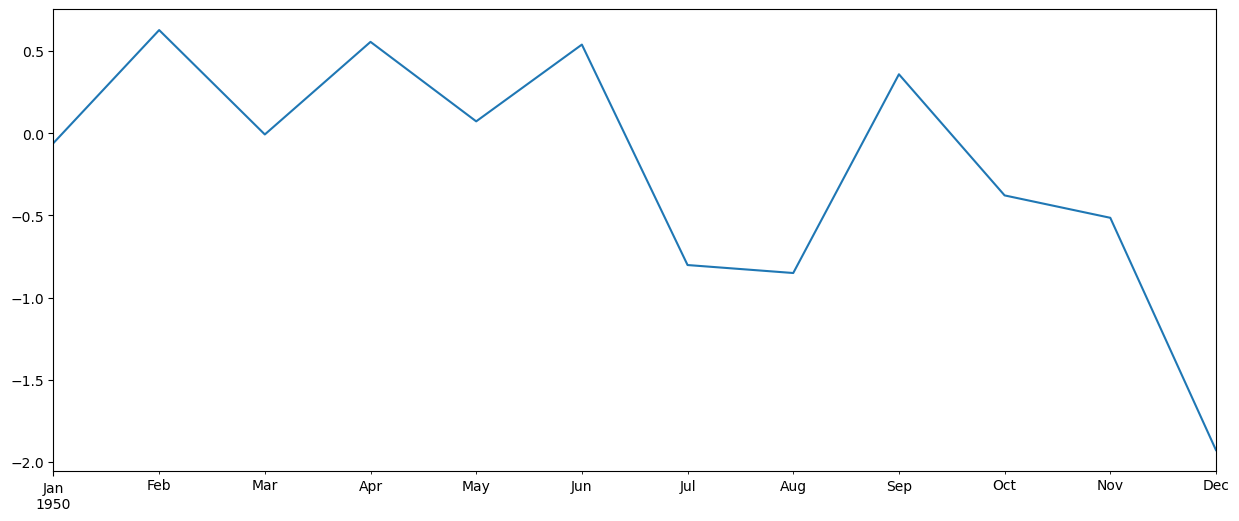

In [34]:
y.loc['1950-01-01':'1950-12-01','value'].plot(figsize=(15, 6))

<Axes: >

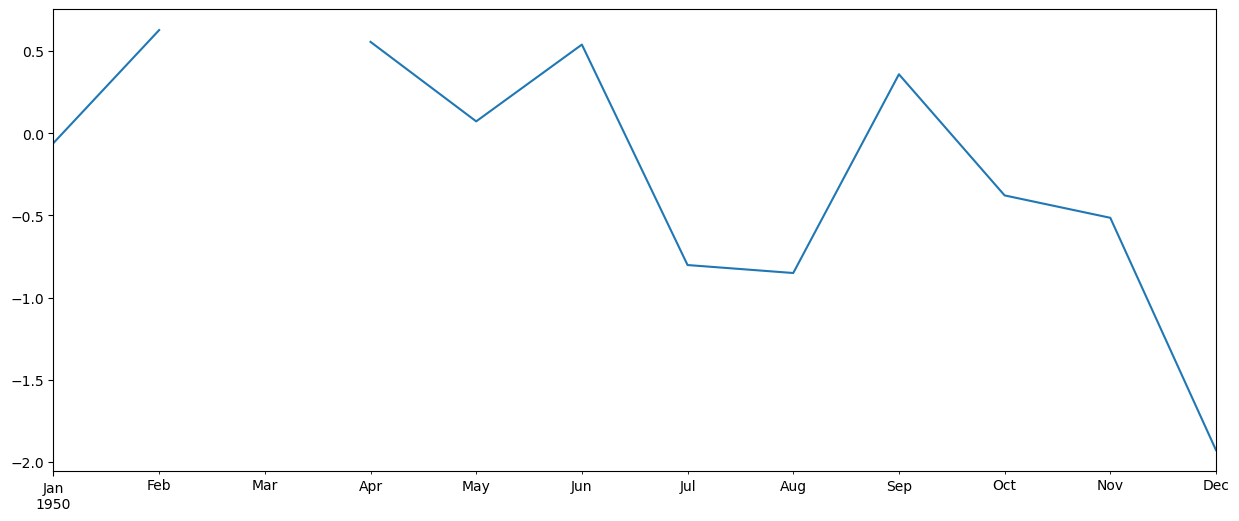

In [35]:
y3.loc['1950-01-01':'1950-12-01','value'].plot(figsize=(15, 6))

<Axes: >

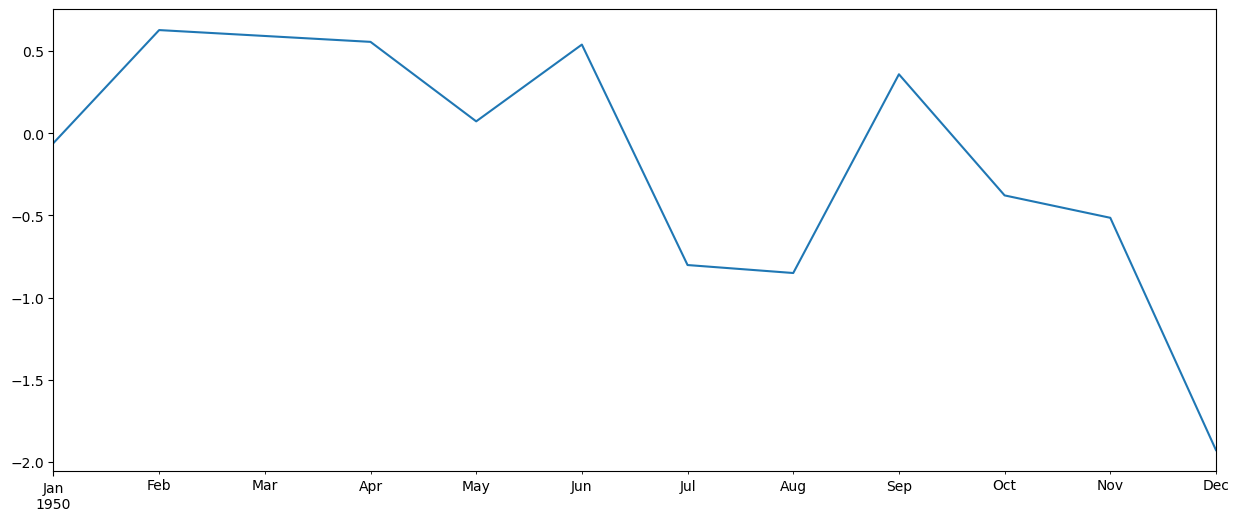

In [36]:
y3.interpolate().loc['1950-01-01':'1950-12-01','value'].plot(figsize=(15, 6))

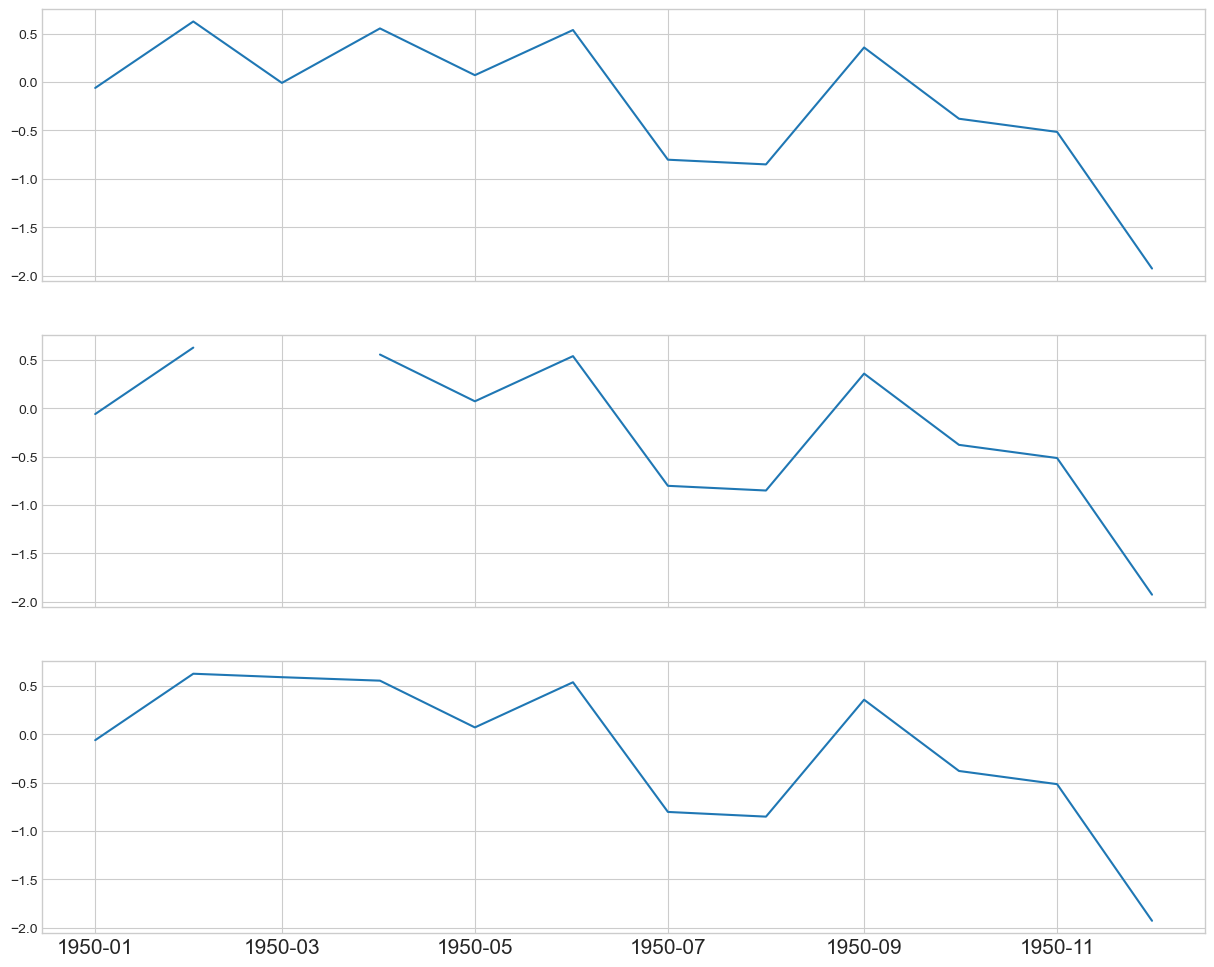

In [37]:
plt.style.use("seaborn-v0_8-whitegrid")
fig, axes = plt.subplots(nrows=3, sharex=True, figsize=(15, 12))
plt.xticks(fontsize = 15)
axes[0].plot( y.loc['1950-01-01':'1950-12-01','value'] )
axes[1].plot(y3.loc['1950-01-01':'1950-12-01','value'] )
axes[2].plot(y3.interpolate().loc['1950-01-01':'1950-12-01','value'] )

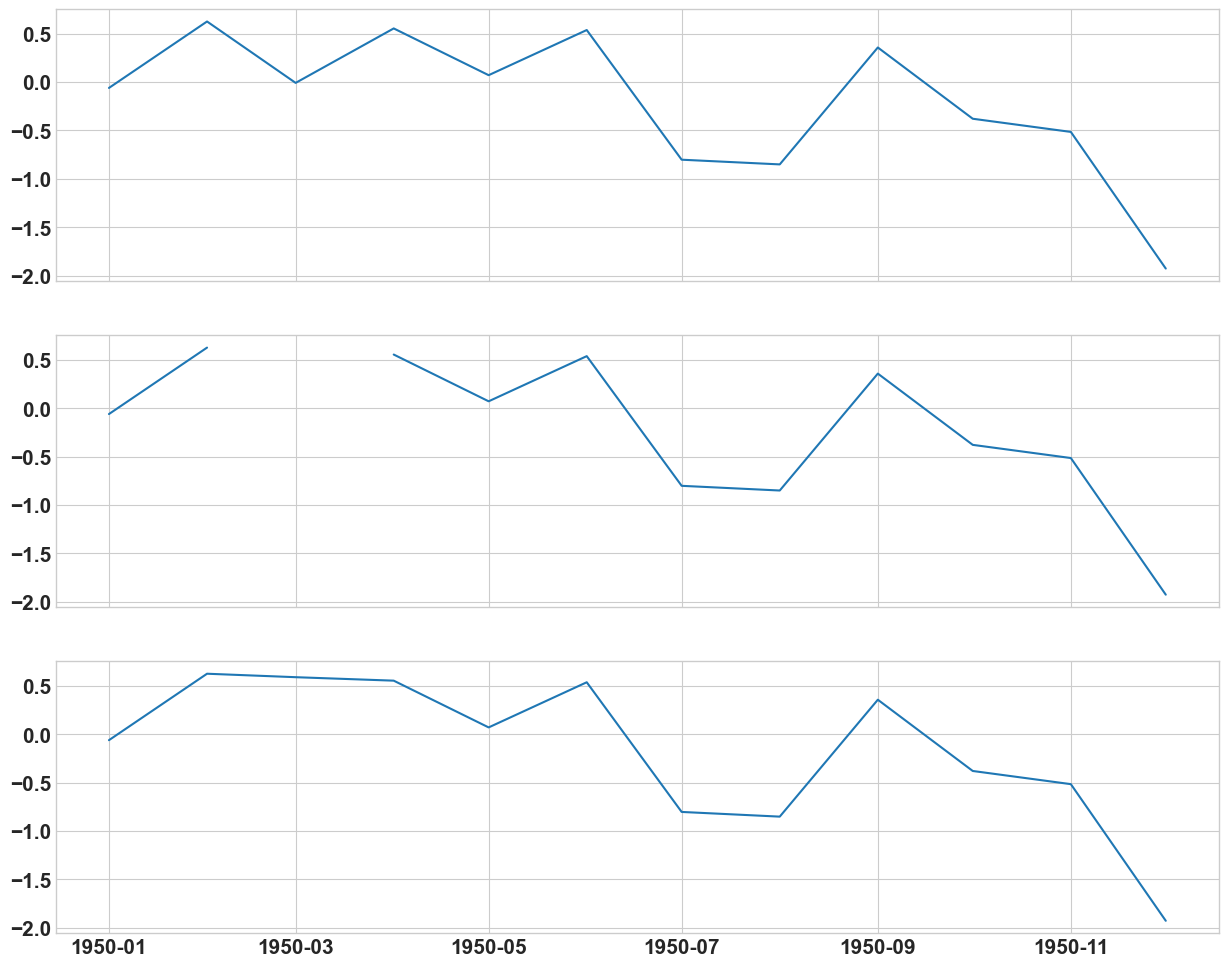

In [38]:
fig, axes = plt.subplots(nrows=3, sharex=True, figsize=(15, 12))
for a in axes:
 for label in (a.get_xticklabels() + a.get_yticklabels()):
  label.set_fontsize(15)
  label.set_fontweight('bold')
axes[0].plot( y.loc['1950-01-01':'1950-12-01','value'] )
axes[1].plot(y3.loc['1950-01-01':'1950-12-01','value'] )
axes[2].plot(y3.interpolate().loc['1950-01-01':'1950-12-01','value'] )

In [39]:
from stargazer.stargazer import Stargazer
from tabulate import tabulate
import seaborn as sns # <- regression plot
import matplotlib.pyplot as plt
import webbrowser

ModuleNotFoundError: No module named 'stargazer'

In [40]:
! pip install stargazer

  Obtaining dependency information for stargazer from https://files.pythonhosted.org/packages/af/49/0f0bc34f94e6ba65f8e5cc06208d11759153f02fb61f4a9f9db98e86bb68/stargazer-0.0.7-py3-none-any.whl.metadata


In [41]:
from stargazer.stargazer import Stargazer
from tabulate import tabulate
import seaborn as sns # <- regression plot
import matplotlib.pyplot as plt
import webbrowser

In [42]:
fileName = r"villa"

# read data in Stata format >>
my_data = pd.read_stata(fileName +'.dta')

In [43]:
# first lines >>
my_data[:10]
# tail lines >>
my_data.tail()
# all lines but the last 1 >>
my_data[:-1]
# all lines but the last 10 >>
my_data[:-10]
# the last 10 lines >>
my_data[-10:]

,n,price,dist,house,area,eco
40,41,16.5,60.0,78,8.5,0
41,42,25.0,50.0,80,10.0,1
42,43,20.0,25.0,65,6.0,0
43,44,20.0,45.0,90,6.0,0
44,45,100.0,7.0,600,15.0,1
45,46,25.0,33.0,85,11.0,0
46,47,50.0,85.0,100,10.0,1
47,48,8.5,50.0,22,14.0,1
48,49,16.5,51.0,60,8.0,0
49,50,320.0,0.5,300,15.0,1


In [44]:
print('\n', my_data.columns)


 Index(['n', 'price', 'dist', 'house', 'area', 'eco'], dtype='object')


In [45]:
my_data.loc[:,['price','eco']]

,price,eco
0,300.0,1
1,60.0,0
2,14.0,1
3,38.0,1
4,85.0,0
5,85.0,0
6,28.0,1
7,83.0,0
8,80.0,1
9,15.0,1


In [46]:
labels = pd.read_stata(fileName +'.dta', iterator=True)
display(labels.variable_labels())

{'n': '#',
 'price': 'price, th-nds USD',
 'dist': 'distance to MCR, km',
 'house': 'floor space, m^2',
 'area': 'land plot area, 100*m^2',
 'eco': '1 - river or lake, 0 - otherwise'}

In [47]:
my_data = pd.read_csv(fileName +'.csv')
  
print('\n', my_data[:10], '\n')
my_data.info()


     n  price  dist  house  area  eco
0   1  300.0  20.0    400  22.0    1
1   2   60.0  18.0    170   6.0    0
2   3   14.0  90.0     60  11.0    1
3   4   38.0  18.0     65   6.0    1
4   5   85.0  25.0    320  20.0    0
5   6   85.0  19.0    210  20.0    0
6   7   28.0  30.0     60   5.0    1
7   8   83.0  45.0    228  20.0    0
8   9   80.0  25.0    200  20.0    1
9  10   15.0  46.0     36  10.0    1 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   n       50 non-null     int64  
 1   price   50 non-null     float64
 2   dist    50 non-null     float64
 3   house   50 non-null     int64  
 4   area    50 non-null     float64
 5   eco     50 non-null     int64  
dtypes: float64(3), int64(3)
memory usage: 2.5 KB


In [48]:
my_data = pd.read_excel(fileName +'.xlsx')

print('\n', my_data[:10], '\n')
my_data.info()

my_data = pd.read_excel(fileName +'.xlsx', sheet_name="Sheet1")


     n  price  dist  house  area  eco
0   1  300.0  20.0    400  22.0    1
1   2   60.0  18.0    170   6.0    0
2   3   14.0  90.0     60  11.0    1
3   4   38.0  18.0     65   6.0    1
4   5   85.0  25.0    320  20.0    0
5   6   85.0  19.0    210  20.0    0
6   7   28.0  30.0     60   5.0    1
7   8   83.0  45.0    228  20.0    0
8   9   80.0  25.0    200  20.0    1
9  10   15.0  46.0     36  10.0    1 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   n       50 non-null     int64  
 1   price   50 non-null     float64
 2   dist    50 non-null     float64
 3   house   50 non-null     int64  
 4   area    50 non-null     float64
 5   eco     50 non-null     int64  
dtypes: float64(3), int64(3)
memory usage: 2.5 KB


In [52]:
print('\n', my_data.describe(), '\n\n',
 my_data.describe().T[['count','mean', 'std',
                       'min', 'max']])


               n       price        dist       house       area        eco
count  50.00000   50.000000   50.000000   50.000000  50.000000  50.000000
mean   25.50000   78.250000   44.050000  192.240000  13.750000   0.500000
std    14.57738   84.343216   28.804806  151.847474   6.913644   0.505076
min     1.00000    5.000000    0.500000   22.000000   5.000000   0.000000
25%    13.25000   16.625000   25.000000   61.250000   8.875000   0.000000
50%    25.50000   46.000000   30.000000  160.000000  14.000000   0.500000
75%    37.75000   99.000000   63.750000  300.000000  15.000000   1.000000
max    50.00000  320.000000  105.000000  600.000000  40.000000   1.000000 

        count    mean         std   min    max
n       50.0   25.50   14.577380   1.0   50.0
price   50.0   78.25   84.343216   5.0  320.0
dist    50.0   44.05   28.804806   0.5  105.0
house   50.0  192.24  151.847474  22.0  600.0
area    50.0   13.75    6.913644   5.0   40.0
eco     50.0    0.50    0.505076   0.0    1.0


In [53]:
groupby_eco=my_data.groupby('eco')

In [54]:
# mean price on subsamples
for i, j in groupby_eco['price']:
    print("eco = {:.0f} ->  mean Price = {:.2f}"
          .format(i, j.mean()))

eco = 0 ->  mean Price = 39.36
eco = 1 ->  mean Price = 117.14


In [55]:
# all mean values on subsamples
print('\n', my_data.groupby('eco').mean()[['price',
                                           'dist']] )


       price   dist
eco               
0     39.36  52.96
1    117.14  35.14


In [56]:
# correlation matrix >>
cm = my_data.loc[:,'price':'eco'].corr()
print('\n', cm )


           price      dist     house      area       eco
price  1.000000 -0.547239  0.673724  0.576627  0.465773
dist  -0.547239  1.000000 -0.541391 -0.159648 -0.312464
house  0.673724 -0.541391  1.000000  0.603486  0.201435
area   0.576627 -0.159648  0.603486  1.000000  0.246926
eco    0.465773 -0.312464  0.201435  0.246926  1.000000


<Axes: >

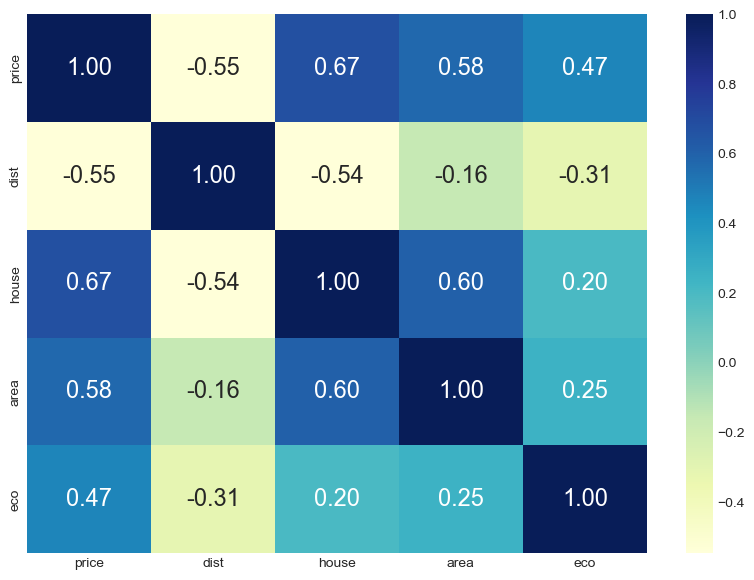

In [57]:
plt.subplots(figsize=(10, 7)) # size in inches
plt.rc('xtick', labelsize=17)
sns.heatmap(cm, annot=True, fmt=".2f", cmap='YlGnBu',
            annot_kws={"fontsize":17})

<Axes: >

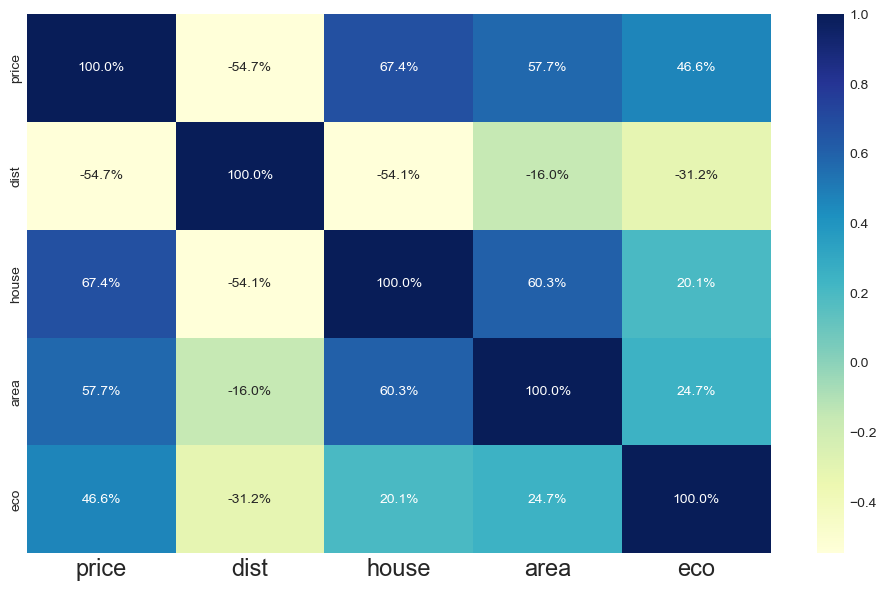

In [58]:
# format - percentages >>
plt.subplots(figsize=(12,7)) # size in inches
sns.heatmap(cm, annot=True, fmt=".1%", cmap='YlGnBu')

In [59]:
# color-encoded correlation matrix >>
plt.figure(figsize=(12,5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

<Axes: >

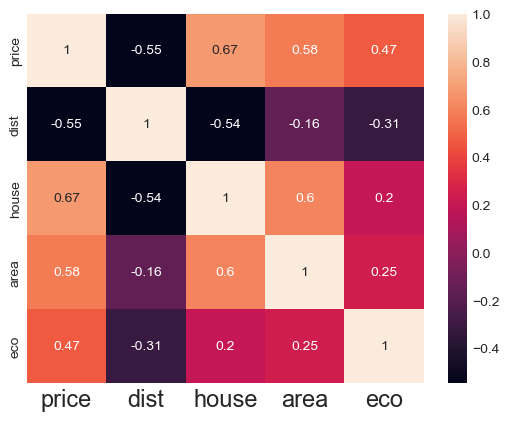

In [60]:
sns.heatmap(my_data.loc[:,'price':'eco'].corr(),
            annot=True)

<Axes: >

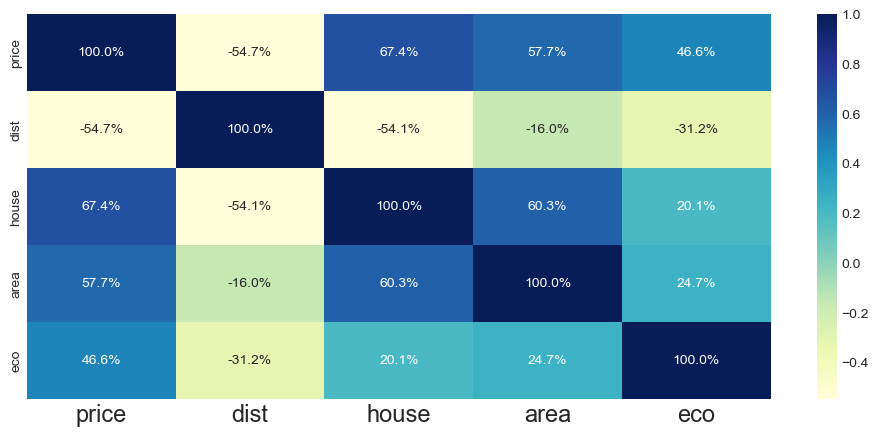

In [61]:
plt.figure(figsize=(12,5))
sns.heatmap(my_data.loc[:,'price':'eco'].corr(),
            annot=True,
            fmt=".1%", cmap='YlGnBu')

In [62]:
print('\n', pd.crosstab(my_data['area'],my_data.eco) )


 eco   0  1
area      
5.0   0  1
6.0   5  2
7.0   1  0
8.0   2  1
8.5   1  0
10.0  2  5
11.0  1  1
12.0  2  0
14.0  1  1
15.0  5  7
17.0  1  0
18.0  0  1
19.0  1  0
20.0  3  1
22.0  0  1
24.0  0  1
25.0  0  1
32.0  0  1
40.0  0  1


In [64]:
dep = my_data['price']
# add constant in model >>
my_data['c'] = 1
# list of explanatory variables is inside [] >>
expl = my_data[['dist','house','area','eco','c']]

In [65]:
reg = sm.OLS(dep, expl, missing='drop').fit()

In [66]:
# view results >>
print(reg.summary())
# better view >>
print(summary_col(reg,stars=True,float_format='%0.3f'))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     19.31
Date:                Wed, 05 Jun 2024   Prob (F-statistic):           2.62e-09
Time:                        16:10:55   Log-Likelihood:                -267.20
No. Observations:                  50   AIC:                             544.4
Df Residuals:                      45   BIC:                             554.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
dist          -0.7387      0.341     -2.166      0.0

In [67]:
# what is known after the OLS >>
dir(reg)
# or just >>
reg.__dir__()

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abat_diagonal',
 '_cache',
 '_data_attr',
 '_data_in_cache',
 '_get_robustcov_results',
 '_get_wald_nonlinear',
 '_is_nested',
 '_transform_predict_exog',
 '_use_t',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 '

In [68]:
# better view >>
print(summary_col(reg,stars=True,float_format='%0.3f',
    info_dict={'Observations':lambda x:
        "{0:d}".format(int(x.nobs)),
   'Adj. R-sq.':lambda x:
       "{:.3f}".format(x.rsquared_adj),
   'F':lambda x:
       "{:.1f}".format(x.fvalue)}))


                price  
-----------------------
dist           -0.739**
               (0.341) 
house          0.175** 
               (0.077) 
area           3.462** 
               (1.471) 
eco            42.324**
               (16.378)
c              8.412   
               (26.373)
R-squared      0.632   
R-squared Adj. 0.599   
Observations   50      
Adj. R-sq.     0.599   
F              19.3    
Standard errors in
parentheses.
* p<.1, ** p<.05,
***p<.01


In [69]:
# the same by other print command >>
inL = summary_col(reg,stars=True,float_format='%0.3f',
    info_dict={'Observations':lambda x:
        "{0:d}".format(int(x.nobs)),
   'Adj. R-sq.':lambda x:
       "{:.3f}".format(x.rsquared_adj),
   'F':lambda x:
       "{:.1f}".format(x.fvalue)})
print(inL)


                price  
-----------------------
dist           -0.739**
               (0.341) 
house          0.175** 
               (0.077) 
area           3.462** 
               (1.471) 
eco            42.324**
               (16.378)
c              8.412   
               (26.373)
R-squared      0.632   
R-squared Adj. 0.599   
Observations   50      
Adj. R-sq.     0.599   
F              19.3    
Standard errors in
parentheses.
* p<.1, ** p<.05,
***p<.01


In [70]:
# several columns >>
expl2 = my_data[['dist','c']]
reg2 = sm.OLS(dep,expl2, missing='drop').fit()

info={'Observations' : lambda x: f"{int(x.nobs):d}",
        'Adj. R-sq.' : lambda x: f"{x.rsquared_adj:.3f}",
        'F' : lambda x: f"{x.fvalue:.1f}",
        'F p-value' : lambda x: f"{x.f_pvalue:.3f}"}
results_table = summary_col(results=[reg2,reg],
                 float_format='%0.3f',
                 stars = True,
                 model_names=['Model 1','Model 2'],
                 info_dict=info,
                 regressor_order=expl.columns.tolist())
results_table.add_title('Table 2 - OLS Regressions')
print(results_table)

    Table 2 - OLS Regressions
                Model 1   Model 2 
----------------------------------
dist           -1.602***  -0.739**
               (0.354)    (0.341) 
house                     0.175** 
                          (0.077) 
area                      3.462** 
                          (1.471) 
eco                       42.324**
                          (16.378)
c              148.834*** 8.412   
               (18.562)   (26.373)
R-squared      0.299      0.632   
R-squared Adj. 0.285      0.599   
Observations   50         50      
Adj. R-sq.     0.285      0.599   
F              20.5       19.3    
F p-value      0.000      0.000   
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [71]:
## output in LaTeX format >>
#
print(reg.summary().as_latex())

\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}    &      price       & \textbf{  R-squared:         } &     0.632   \\
\textbf{Model:}            &       OLS        & \textbf{  Adj. R-squared:    } &     0.599   \\
\textbf{Method:}           &  Least Squares   & \textbf{  F-statistic:       } &     19.31   \\
\textbf{Date:}             & Wed, 05 Jun 2024 & \textbf{  Prob (F-statistic):} &  2.62e-09   \\
\textbf{Time:}             &     16:11:53     & \textbf{  Log-Likelihood:    } &   -267.20   \\
\textbf{No. Observations:} &          50      & \textbf{  AIC:               } &     544.4   \\
\textbf{Df Residuals:}     &          45      & \textbf{  BIC:               } &     554.0   \\
\textbf{Df Model:}         &           4      & \textbf{                     } &             \\
\textbf{Covariance Type:}  &    nonrobust     & \textbf{                     } &             \\
\bottomrule
\end{tabular}
\begin{tabular}{lcccccc}
               & \textbf{coef} & \textb

In [72]:
## Stargazer examples >>
#
url="https://github.com/mwburke/stargazer/blob/master/examples.ipynb"
webbrowser.open(url)

True

In [73]:
stargazer = Stargazer([reg,reg2])

In [74]:
# HTML Example >>
# copy & put it into *.html and open... >>
print('\n', stargazer.render_html() )


 <table style="text-align:center"><tr><td colspan="3" style="border-bottom: 1px solid black"></td></tr>
<tr><td style="text-align:left"></td><td colspan="2"><em>Dependent variable: price</em></td></tr><tr><td style="text-align:left"></td><tr><td style="text-align:left"></td><td>(1)</td><td>(2)</td></tr>
<tr><td colspan="3" style="border-bottom: 1px solid black"></td></tr>

<tr><td style="text-align:left">area</td><td>3.462<sup>**</sup></td><td></td></tr>
<tr><td style="text-align:left"></td><td>(1.471)</td><td></td></tr>
<tr><td style="text-align:left">c</td><td>8.412<sup></sup></td><td>148.834<sup>***</sup></td></tr>
<tr><td style="text-align:left"></td><td>(26.373)</td><td>(18.562)</td></tr>
<tr><td style="text-align:left">dist</td><td>-0.739<sup>**</sup></td><td>-1.602<sup>***</sup></td></tr>
<tr><td style="text-align:left"></td><td>(0.341)</td><td>(0.354)</td></tr>
<tr><td style="text-align:left">eco</td><td>42.324<sup>**</sup></td><td></td></tr>
<tr><td style="text-align:left"></

In [76]:
st = Stargazer([reg,reg2])

st.show_degrees_of_freedom(False)

In [78]:
# you may mark only 3 significance levels !!! >>
st.significance_levels([0.2, 0.1, 0.05])



<Axes: xlabel='dist', ylabel='price'>

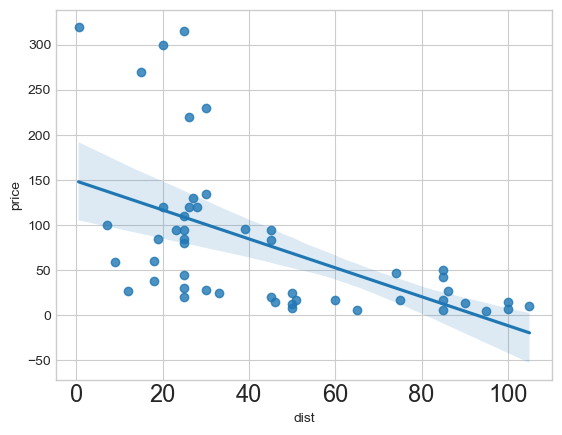

In [79]:
#
sns.regplot(y=my_data["price"], x=my_data["dist"])

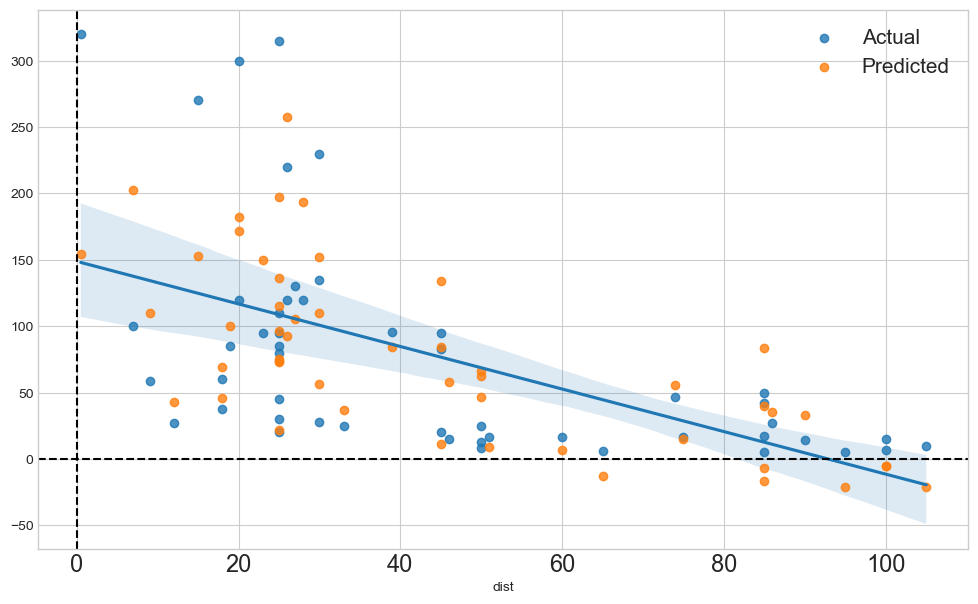

In [80]:
# predict values >>
phat = reg.predict(my_data[['dist','house','area',
                            'eco','c']])

# & plot them >>
plt.figure(figsize=(12,7))
sns.regplot(y=my_data["price"], x=my_data["dist"],
            label='Actual');
sns.regplot(y=phat, x=my_data["dist"],
            fit_reg=False, label='Predicted');
plt.axvline(0, color="k", linestyle="--");
plt.axhline(0, color="k", linestyle="--")
plt.legend(loc='best', fontsize=15)

In [81]:
import tkinter as tk
from tkinter import filedialog
import pandas as pd

In [82]:
# initializing tcl/tk interpreter >>
window = tk.Tk()
# for opening filedialog window on top of other windows >>
window.wm_attributes('-topmost', 1)
# this will close empty tk-window after filedialog >>
window.withdraw()

''

In [83]:
## get file name >>
fileName = filedialog.askopenfilename(title="Select file",
                    filetypes=(("Excel files", "*.xlsx"),
                               ("All files", "*.*")),
                    parent=window)
# read data >>
df = pd.read_excel(fileName)

print('\n', df)


      n  price   dist  house  area  eco
0    1  300.0   20.0    400  22.0    1
1    2   60.0   18.0    170   6.0    0
2    3   14.0   90.0     60  11.0    1
3    4   38.0   18.0     65   6.0    1
4    5   85.0   25.0    320  20.0    0
5    6   85.0   19.0    210  20.0    0
6    7   28.0   30.0     60   5.0    1
7    8   83.0   45.0    228  20.0    0
8    9   80.0   25.0    200  20.0    1
9   10   15.0   46.0     36  10.0    1
10  11   27.0   86.0    180  17.0    0
11  12   42.0   85.0    250  15.0    1
12  13    5.5   85.0     36  12.0    0
13  14   47.0   74.0    285  15.0    0
14  15    5.0   95.0     36  10.0    0
15  16   59.0    9.0    420  10.0    0
16  17   27.0   12.0    130   6.0    0
17  18  270.0   15.0    350  15.0    1
18  19   96.0   39.0    300  15.0    0
19  20   95.0   25.0    200  14.0    0
20  21    6.0   65.0     36   6.0    0
21  22  120.0   28.0    300  32.0    1
22  23  135.0   30.0    170  15.0    1
23  24  315.0   25.0    450  25.0    1
24  25   10.0  105.0   

In [84]:
## get file name >>
SfileName = filedialog.asksaveasfilename(title="Select file",
                    filetypes=(("Excel files", "*.xlsx"),
                               ("All files", "*.*")),
                    parent=window)
print('\nSaving data in\n', SfileName + ".xlsx")

# save data >>
df.to_excel(SfileName + ".xlsx", index=False)


Saving data in
 C:/Users/mixas/intro/villa.xlsx.xlsx
